Задание 3

Произведите подключение всех необходимых библиотек (Pandas, Keras, Seaborn) при помощи вызова конструкций import, как было описано в разделе «Инструменты и библиотеки». 

In [1]:
import tensorflow as tf
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Самостоятельно реализуйте и обучите свёрточную нейронную сеть для распознавания изображений из популярного учебного датасета CIFAR106. Руководствуйтесь следующим примером: https://www.tensorflow.org/tutorials/images/cnn . Отметьте в отчёте затраты времени на обучение и достигнутую точность. 

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


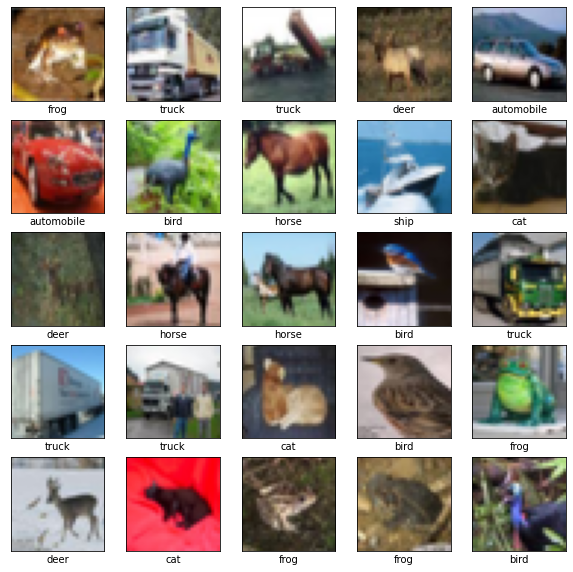

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Create the convolutional base

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [6]:
# add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2047 - accuracy: 0.5694 - val_loss: 1.1095 - val_accuracy: 0.6076
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0484 - accuracy: 0.6267 - val_loss: 1.0395 - val_accuracy: 0.6360
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9496 - accuracy: 0.6651 - val_loss: 0.9507 - val_accuracy: 0.6697
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8728 - accuracy: 0.6920 - val_loss: 0.9928 - val_accuracy: 0.6604
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8098 - accuracy: 0.7158 - val_loss: 0.8751 - val_accuracy: 0.7036
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7640 - accuracy: 0.7301 - val_loss: 0.8882 - val_accuracy: 0.6931
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7191 - accuracy: 0.7452 - val_loss: 0.8621 - val_accuracy:

Evaluate the model

313/313 - 1s - loss: 0.9011 - accuracy: 0.7043 - 710ms/epoch - 2ms/step


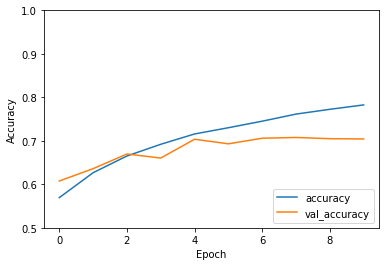

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [12]:
print('88s', test_acc)

88s 0.7042999863624573


Для датасета CIFAR-100

In [13]:
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data(label_mode='fine')

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 2s 0us/step


In [14]:
x_train.shape

(50000, 32, 32, 3)

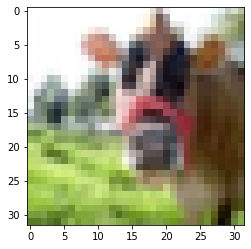

In [15]:
plt.imshow(x_train[0])

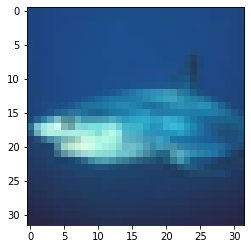

In [16]:
plt.imshow(x_train[-1])

In [17]:
images_to_show = []
for i, image in enumerate(x_train):
    if (i + 1) % 1000 == 0:
        images_to_show.append(i)

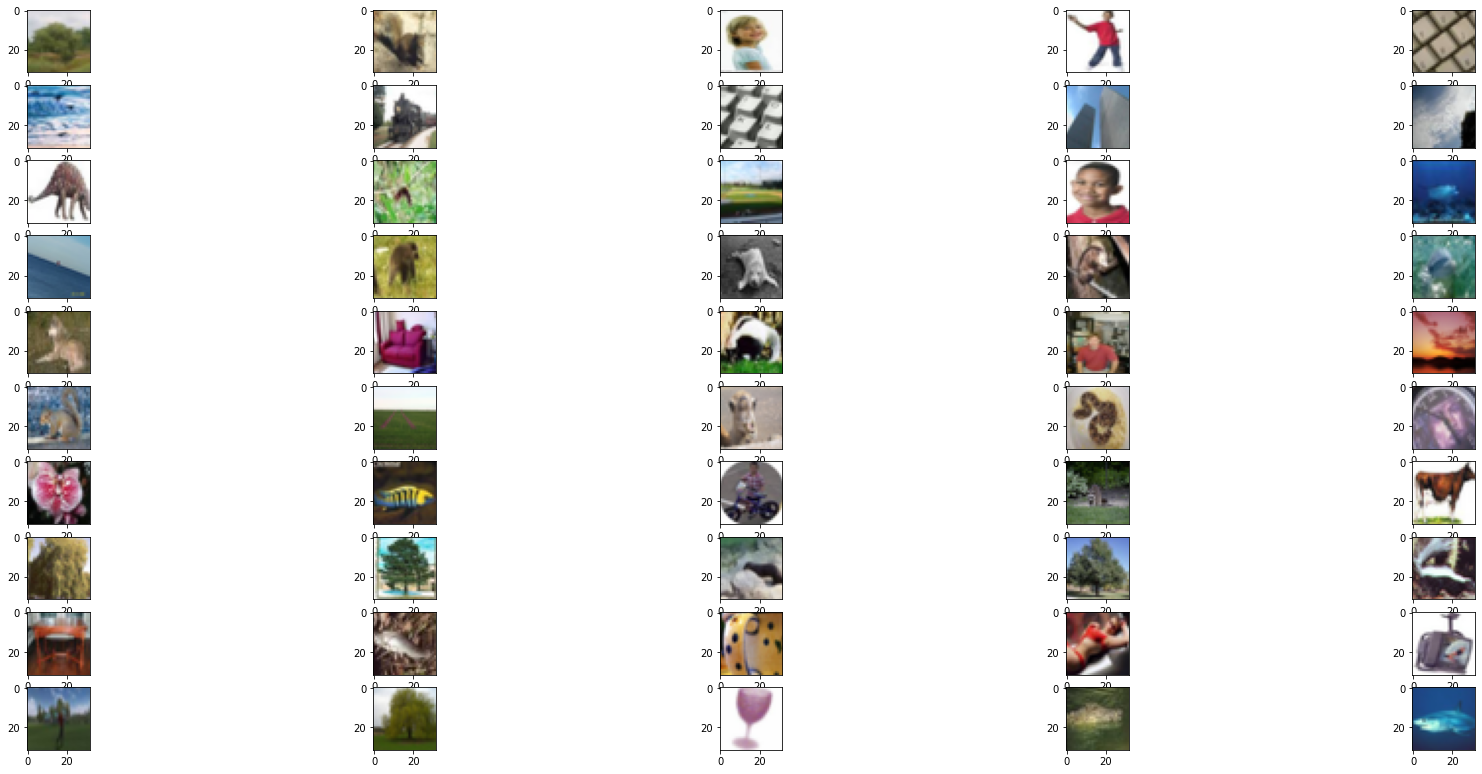

In [18]:
plt.figure(figsize=(30,15))
columns = 5
for i, image in enumerate(x_train[images_to_show]):
    plt.subplot(len(images_to_show) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [19]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

In [20]:
# add dense layer 
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(100))

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [25]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])

In [29]:
%%time
model1history = model1.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), shuffle=True, verbose=1)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 2.1005 - accuracy: 0.4332 - val_loss: 3.6422 - val_accuracy: 0.2392
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 2.0172 - accuracy: 0.4511 - val_loss: 3.7864 - val_accuracy: 0.2355
Epoch 3/10
782/782 [==============================] - 4s 6ms/step - loss: 1.9355 - accuracy: 0.4707 - val_loss: 3.8987 - val_accuracy: 0.2338
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 1.8559 - accuracy: 0.4872 - val_loss: 4.0947 - val_accuracy: 0.2252
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.7902 - accuracy: 0.5036 - val_loss: 4.0391 - val_accuracy: 0.2272
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 1.7350 - accuracy: 0.5157 - val_loss: 4.1587 - val_accuracy: 0.2247
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.6830 - accuracy: 0.5276 - val_loss: 4.3562 - val_accuracy: 0.2225
Epoch 

313/313 - 1s - loss: 4.9910 - accuracy: 0.2177 - 746ms/epoch - 2ms/step


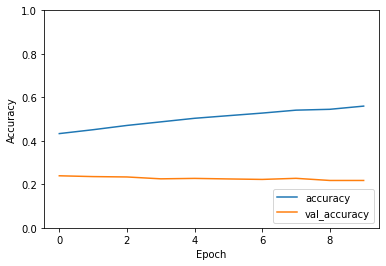

In [30]:
plt.plot(model1history.history['accuracy'], label='accuracy')
plt.plot(model1history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

In [31]:
print('1min 22s', test_acc)

1min 22s 0.21770000457763672


Мы поменяли последний Dense слой для 100 классов.
Видимо, из-за большего количества классов для классификации та же структура, дающая для 10 классов 70% точности, уже не сможет дать тот же результат для 100 классов.

Попробуем увеличить размер бэтчей

In [32]:
%%time
model1history = model1.fit(x_train, y_train, batch_size=120, epochs=10, validation_data=(x_test, y_test), shuffle=True, verbose=1)

Epoch 1/10
417/417 [==============================] - 3s 7ms/step - loss: 1.2292 - accuracy: 0.6433 - val_loss: 5.2057 - val_accuracy: 0.2252
Epoch 2/10
417/417 [==============================] - 3s 7ms/step - loss: 1.1019 - accuracy: 0.6789 - val_loss: 5.4194 - val_accuracy: 0.2230
Epoch 3/10
417/417 [==============================] - 3s 7ms/step - loss: 1.0627 - accuracy: 0.6886 - val_loss: 5.7310 - val_accuracy: 0.2211
Epoch 4/10
417/417 [==============================] - 3s 7ms/step - loss: 1.0574 - accuracy: 0.6886 - val_loss: 6.1118 - val_accuracy: 0.2164
Epoch 5/10
417/417 [==============================] - 3s 7ms/step - loss: 1.0710 - accuracy: 0.6843 - val_loss: 6.1909 - val_accuracy: 0.2216
Epoch 6/10
417/417 [==============================] - 3s 7ms/step - loss: 1.0543 - accuracy: 0.6887 - val_loss: 6.3105 - val_accuracy: 0.2113
Epoch 7/10
417/417 [==============================] - 3s 7ms/step - loss: 1.0401 - accuracy: 0.6898 - val_loss: 6.5739 - val_accuracy: 0.2139
Epoch 

313/313 - 1s - loss: 7.0914 - accuracy: 0.2120 - 1s/epoch - 4ms/step


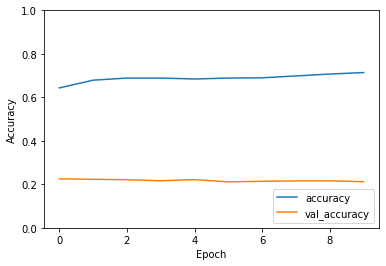

In [33]:
plt.plot(model1history.history['accuracy'], label='accuracy')
plt.plot(model1history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

In [34]:
print('47.4 s', test_acc)

47.4 s 0.21199999749660492


Ничего особо не поменялось, значит для увеличения точности стоит увеличить количество слоев

In [45]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(0.2))

In [46]:
model1.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(0.2))

In [47]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(100))

In [48]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)         

In [49]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])

In [50]:
%%time
model1history = model1.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), shuffle=True, verbose=1)

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 5.4997 - accuracy: 0.0090 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 4.6057 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 4.6058 - accuracy: 0.0083 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 4.6057 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 4.6057 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 4.6057 - accuracy: 0.0090 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 4.6057 - accuracy: 0.0085 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 

313/313 - 1s - loss: 4.6052 - accuracy: 0.0100 - 828ms/epoch - 3ms/step


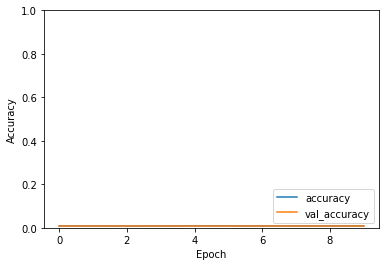

In [51]:
plt.plot(model1history.history['accuracy'], label='accuracy')
plt.plot(model1history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)